In [76]:
import matplotlib.pyplot as plt
from data_processing.cgm_data import CGMData

data = CGMData()

## Some EDA: bar graphs of demographics

In [77]:
data.demographics

,Gender,HbA1c
ID,,
13,MALE,5.7
1,FEMALE,5.5
3,FEMALE,5.9
4,FEMALE,6.4
5,FEMALE,5.7
2,MALE,5.6
6,FEMALE,5.8
7,FEMALE,5.3
8,FEMALE,5.6


In [78]:
Gender_counts = data.demographics['Gender'].value_counts().sort_index()
HbA1c_counts = data.demographics['HbA1c'].value_counts().sort_index()

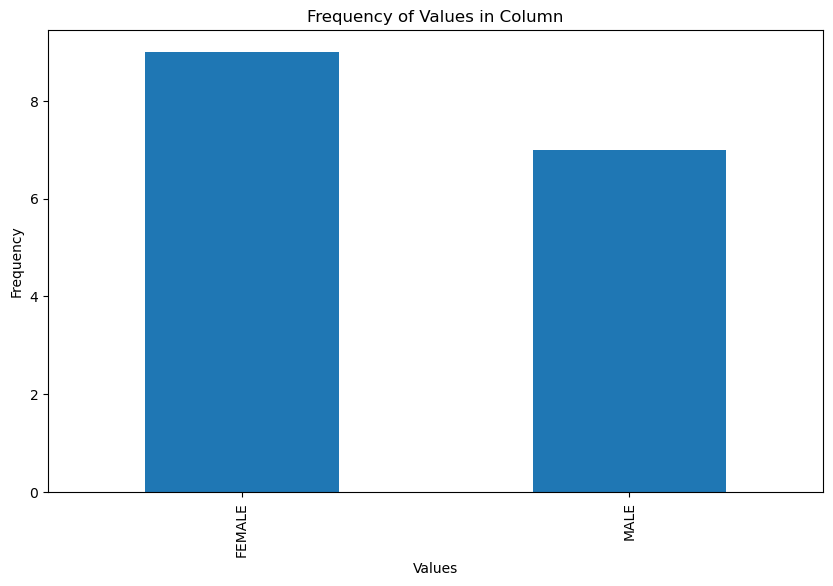

In [79]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
Gender_counts.plot(kind='bar')

# Set the title and labels
plt.title('Frequency of Values in Column')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

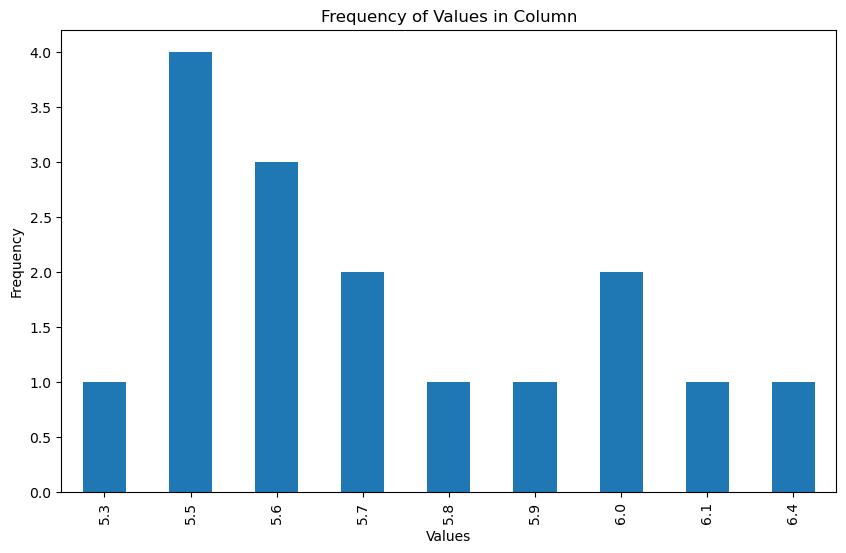

In [80]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
HbA1c_counts.plot(kind='bar')

# Set the title and labels
plt.title('Frequency of Values in Column')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Glucose differences

In [81]:
differences = data[2].glu.diff(2)

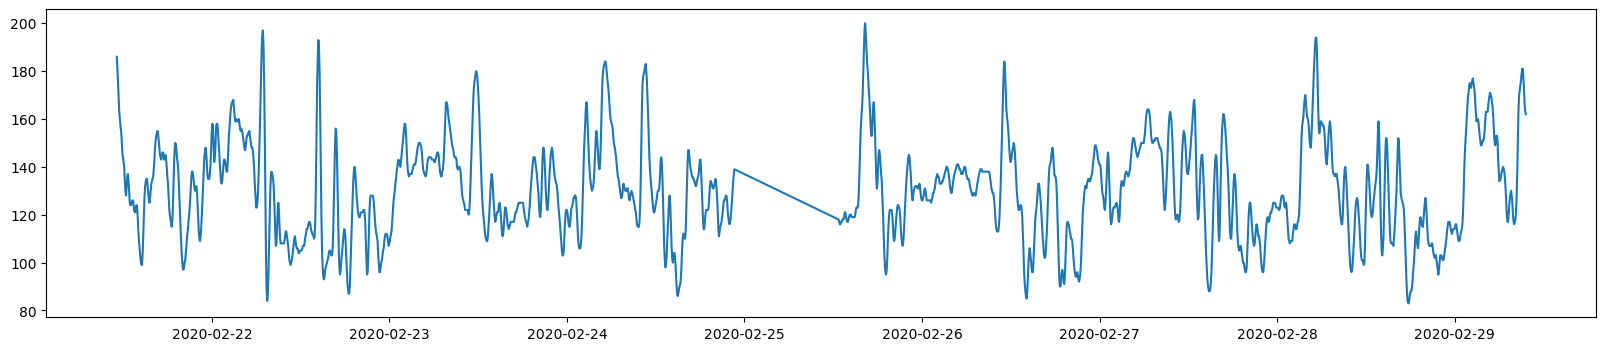

In [82]:
plt.figure(figsize=(20, 4))
plt.plot(data[2].glu)

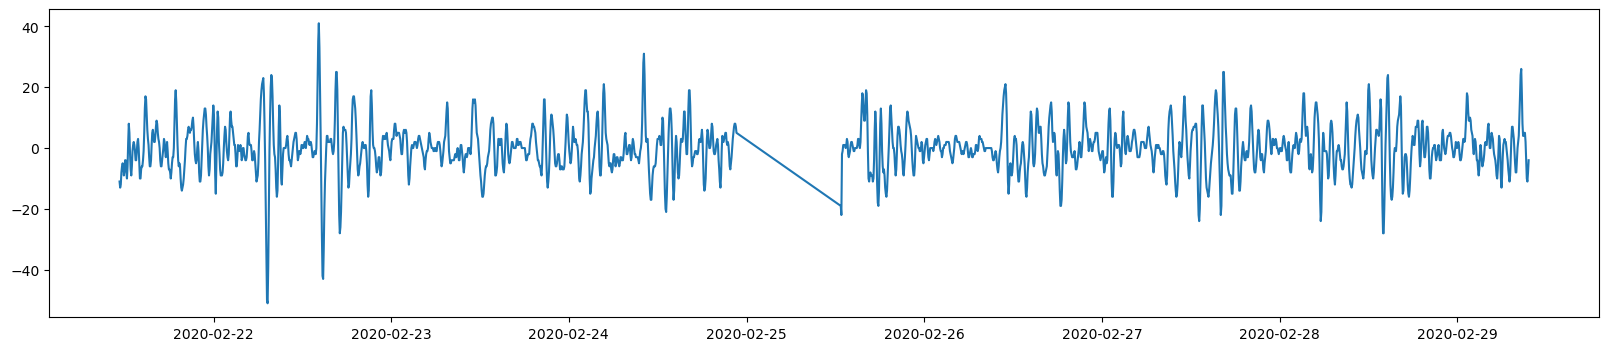

In [123]:
plt.figure(figsize=(20, 4))
plt.plot(differences)

In [126]:
differences

,glucose
datetime,
2020-02-21 11:08:36,NaN
2020-02-21 11:13:36,NaN
2020-02-21 11:18:36,-11.0
2020-02-21 11:23:35,-13.0
2020-02-21 11:28:36,-12.0
...,...
2020-02-29 09:18:25,-4.0
2020-02-29 09:23:24,-10.0
2020-02-29 09:28:24,-11.0


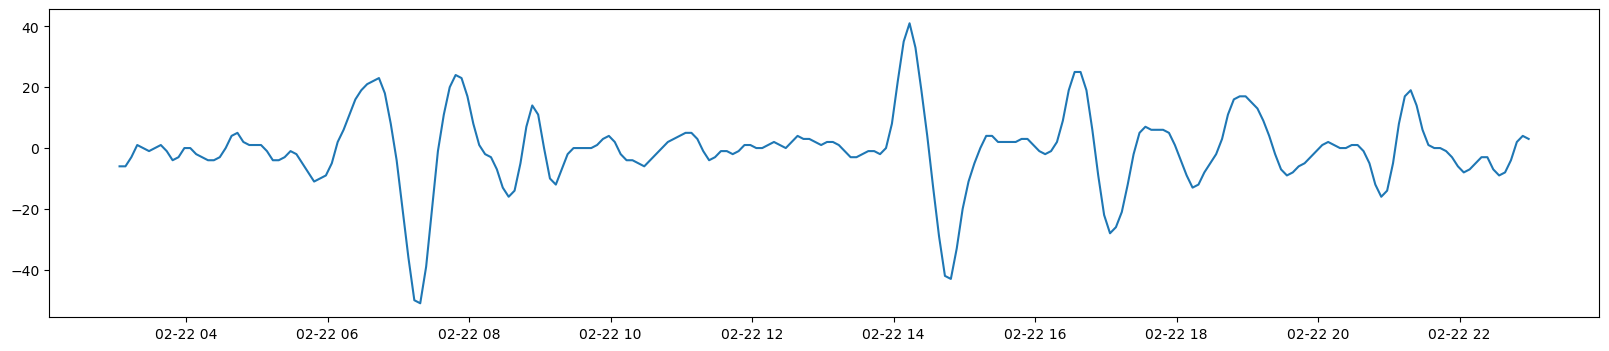

In [161]:
plt.figure(figsize=(20, 4))
plt.plot(differences[(differences.index < '2020-02-22 23:00:00') & (differences.index > '2020-02-22 03:00:00')])

In [139]:
food2 = pd.read_csv(f'./{DATA_PATH}/002/Food_Log_002.csv', index_col=['time_begin'], parse_dates=['time_begin'], skipinitialspace=True)
glu2 = pd.read_csv(f'./{DATA_PATH}/002/Dexcom_002.csv', header=0, skiprows=range(1, 13), index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'], parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'])

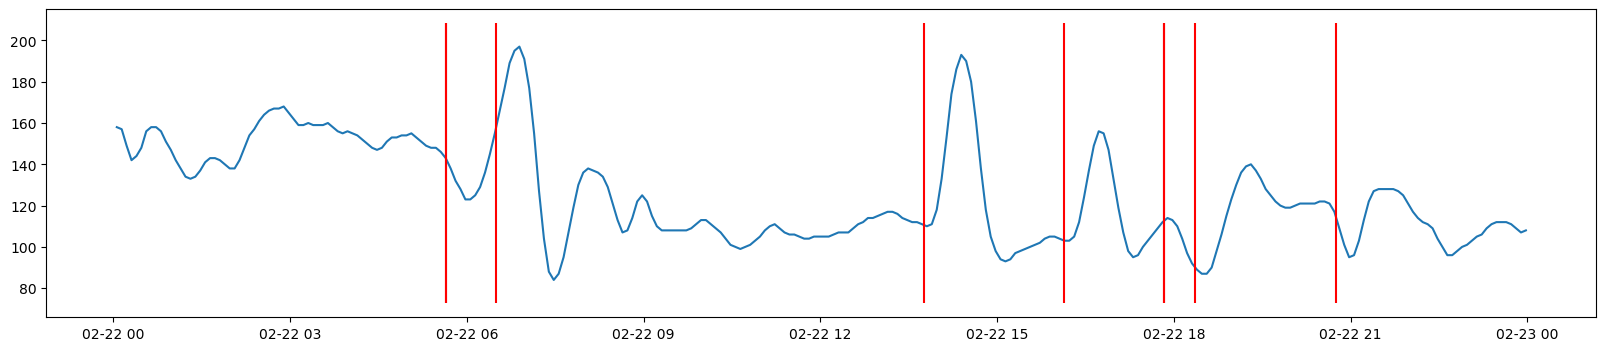

In [160]:
plot_series_with_food(glu2, food2, '2020-02-22', '2020-02-22', 'Glucose Value (mg/dL)')

## For regression

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_processing.cgm_data import CGMData, DATA_PATH
from data_processing.cgm_data_helper import plot_series_with_food
from data_processing.derived_datasets import max_glucose_dataset,max_glucose_between_meals_dataset

In [84]:
# Find 5th/95th percentile for glucose range for each patient
for i in range(1,17):
    print(np.percentile(data[i].glu, 5))
    print(np.percentile(data[i].glu, 95))
    print()

85.0
137.0

99.0
167.0

85.0
140.0

85.0
145.0

83.0
129.0

93.0
188.0

70.0
128.0

83.0
143.8499999999999

97.2
177.0

81.0
178.0

87.0
166.0

99.0
164.6500000000001

97.85000000000001
168.0

nan
nan

88.0
133.44999999999982

82.0
141.25



In [145]:
# Max glucose between meals:
# Use a glu_thresh of 95th percentile?
df = max_glucose_dataset(cgm_data=data,participant_num=5,glu_thresh=130).head(30)
df

,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,recent_meals,participant,max_glucose,high_glucose
0,1285.7,103.1,7.9,1.9,64.8,66.4,1.0,5,171,True
1,24.0,5.9,0.0,3.8,0.0,0.0,1.0,5,130,True
2,316.0,68.0,8.4,16.4,8.1,4.2,1.0,5,181,True
3,60.0,3.0,1.3,0.8,1.0,5.5,1.0,5,128,False
4,280.0,56.5,1.0,24.0,8.0,2.5,1.0,5,166,True
5,113.0,0.9,0.0,0.1,6.4,9.3,1.0,5,144,True
6,111.0,0.4,0.0,0.3,6.5,9.2,1.0,5,116,False
7,280.0,56.5,1.0,24.0,8.0,2.5,1.0,5,150,True
8,463.0,56.6,10.5,4.5,29.2,13.0,1.0,5,112,False
9,71.0,0.3,0.0,0.3,5.0,5.5,1.0,5,105,False


In [146]:
food5 = data[5].food
glu5 = pd.read_csv('data/005/Dexcom_005.csv', header=0, skiprows=range(1, 13), index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'], parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'])

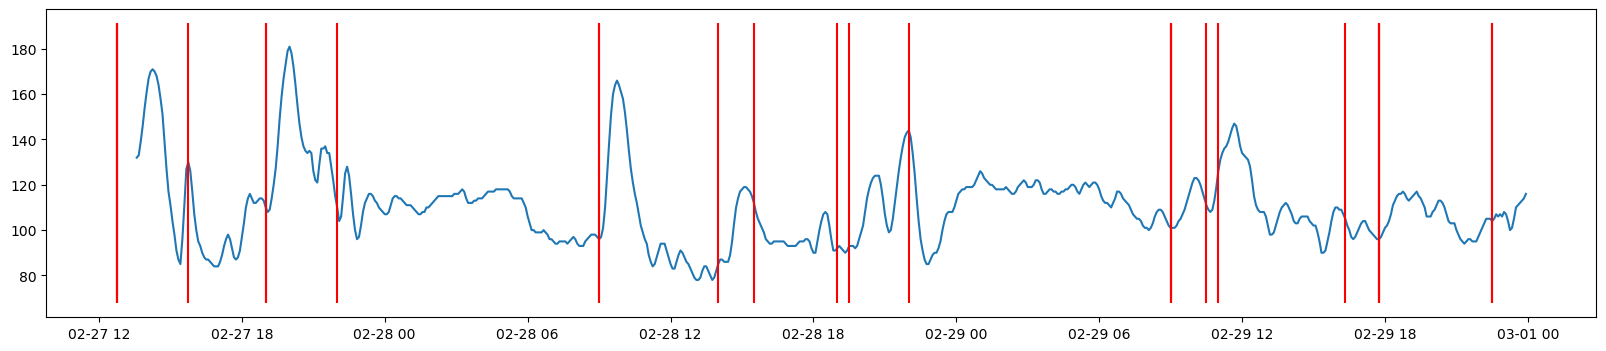

In [149]:
plot_series_with_food(glu5, food5, '2020-02-27', '2020-02-29', 'Glucose Value (mg/dL)')

In [148]:
data[5].glu

,glucose
datetime,
2020-02-27 13:35:12,132.0
2020-02-27 13:40:13,133.0
2020-02-27 13:45:12,139.0
2020-02-27 13:50:13,146.0
2020-02-27 13:55:12,154.0
...,...
2020-03-07 11:26:06,99.0
2020-03-07 11:31:05,96.0
2020-03-07 11:36:06,93.0


In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
X = df[['total_carb','sugar','protein']]
y = df[['high_glucose']]
y

,high_glucose
0,True
1,True
2,True
3,False
4,True
5,True
6,False
7,True
8,False
9,False


In [153]:
## Make the model object

reg = LinearRegression()

## Fit the model object

reg.fit(X, y)

LinearRegression()

In [154]:
reg.coef_, reg.intercept_

(array([[ 0.00961677, -0.00599401, -0.00477793]]), array([0.20374943]))

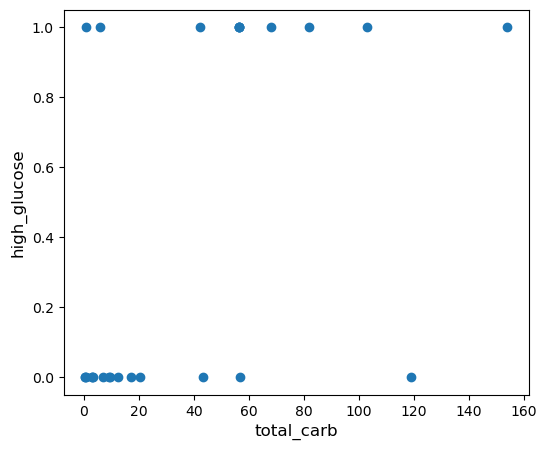

In [155]:
plt.figure(figsize=(6,5))

plt.scatter(df['total_carb'], df['high_glucose'])

plt.xlabel("total_carb", fontsize=12)
plt.ylabel("high_glucose", fontsize=12)
plt.show()

In [156]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty=None)
X = df[['total_carb']]
y = df['high_glucose']
## fit the model
log_reg.fit(X,y)

LogisticRegression(penalty=None)

In [157]:
log_reg.coef_[0][0]

0.03282190912639227

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


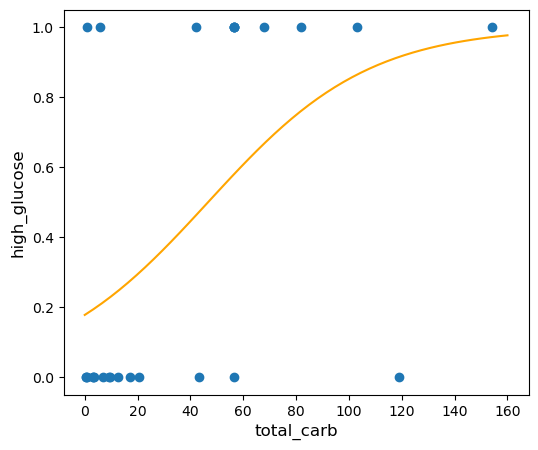

In [158]:
plt.figure(figsize=(6,5))

plt.scatter(X, y)

plt.plot(np.linspace(0,160), log_reg.predict_proba(np.linspace(0,160).reshape(-1,1))[:,1], color = 'orange')
#plt.plot(np.linspace(7,13), my_log_reg.predict_proba(np.linspace(7,13).reshape(-1,1)), c = 'k')

plt.xlabel("total_carb", fontsize=12)
plt.ylabel("high_glucose", fontsize=12)
plt.show()